# Mother Tongues of Canada, by Knowledge of the official languages
by Grace Cowderoy

## Abstract
Canada is a nation with two official languages: English and French. According to the 2021 Statistics Canada census, 98.2% of Canadian residents speak at least one of the official languages. However, only 74.5% of the population consider one of the official languages as their first language (L1), also called their mother tongue - the language first learnt in childhood. For the other 25.6% of people, their mother tongue is a non-official language. 

The dataset Table 98-10-0175-01  Mother tongue by knowledge of official languages: Canada, provinces and territories, census metropolitan areas and census agglomerations with parts provides data from the 2021 Statistics Canada census on the respondent’s mother tongue, age at the time of census, gender, knowledge of the two official languages, and their location within Canada. 

This study proposes to weigh the factors that influence the knowledge of each official language. Research questions include: Does living in a particular area influence a speaker of a non-official language towards English or French? Does any single mother tongue influence a speaker towards English or French? What influence does the age of the speaker have on knowledge of the official languages? 

Classification techniques will be used to identify groups that may be more likely to speak each of the official languages, both the official languages, and those more likely to speak neither official language. As the dataset is imbalanced due to more speakers of English than French, balancing techniques such as oversampling and undersampling will be used. 


## Introduction
In Canada, the term ‘bilingual’ refers to speakers of both official languages, as opposed to the more general term where a speaker knows two different languages. The distribution of these bilingual speakers is not uniform across Canada, and neither is the distribution of speakers of non-official languages. 

The population of Canada has a variety of both indigenous and non-indigenous languages as their mother tongue. Canada is home to 81 living indigenous languages (Ethnologue), with many immigrants bringing their own native language to Canada. 

There are approximately 7,000 languages currently in use in the world (Ethnologue). These languages can be structured into families. English belongs to the Germanic branch of the Indo-European family, while French belongs to the Romance branch of the same family. It has been established that generally it is easier to acquire a second language (L2) when it is closely related to the learner’s first language (L1) (Gampe, A 2021). As such, within Canada, it may reasonably be expected that those speakers with an L1 more closely related to French would have greater knowledge of French. Another factor may be the location of the individual within Canada - policies in different provinces may promote one official language over another. The age of the individual can affect their language skills, as it is generally easier to acquire a second language in childhood compared to adulthood. Further, language policy in Canada has changed over time and varies between the provinces and territories, which suggests that age may be a factor in knowledge of the official languages depending on the policies in place over time. 

This is an investigation of the dataset Statistics Canada. Table 98-10-0175-01  Mother tongue by knowledge of official languages: Canada, provinces and territories, census metropolitan areas and census agglomerations with parts, https://doi.org/10.25318/9810017501-eng 

The dataset was released 2022-08-17 and comes from the 2021 Census of Population of Canada. Due to the recent release of the dataset, it does not yet appear to have been cited on Web of Science (As of 2023-10-07)

The dataset has multiple dimensions, including age, gender, geographic location, mother tongue of respondent, respondent's knowledge of the official languages (French and English). These dimensions include aggregates as individual records, e.g. Canada as a record, Ontario, Toronto. Part of the data cleaning will involve converting these aggregations into their tree structures. 

Importing the required libraries, bringing in the dataset motherTongues Table 98-10-0175-01 and doing the initial exploratory data analysis. 

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ydata_profiling import ProfileReport
from ydata_profiling.model.typeset import ProfilingTypeSet
from bigtree import dataframe_to_tree_by_relation
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, brier_score_loss, matthews_corrcoef
import graphviz

In [1]:
motherTongues_filepath = '/home/grace/Documents/CapstoneProject/MotherTongues/98100175.csv'
motherTongues_data = pd.read_csv(motherTongues_filepath)
motherTongues_data.describe()

/home/grace/anaconda3/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/home/grace/anaconda3/lib/python3.11/site-packages/visions/backends/shared/nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


,REF_DATE,Knowledge of official languages (5):Total - Knowledge of official languages[1],Symbol,Knowledge of official languages (5):English only[2],Symbol.1,Knowledge of official languages (5):French only[3],Symbol.2,Knowledge of official languages (5):English and French[4],Symbol.3,Knowledge of official languages (5):Neither English nor French[5],Symbol.4
count,2591730.0,2.591730e+06,0.0,2.591730e+06,0.0,2.591730e+06,0.0,2.591730e+06,0.0,2.591730e+06,0.0
mean,2021.0,1.067793e+03,NaN,7.499710e+02,NaN,1.010610e+02,NaN,1.881355e+02,NaN,2.855237e+01,NaN
std,0.0,6.512709e+04,NaN,4.737592e+04,NaN,1.002769e+04,NaN,1.314044e+04,NaN,1.603253e+03,NaN
min,2021.0,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,NaN
25%,2021.0,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,NaN
50%,2021.0,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,NaN
75%,2021.0,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,NaN
max,2021.0,3.662096e+07,NaN,2.526166e+07,NaN,4.087895e+06,NaN,6.581680e+06,NaN,6.897250e+05,NaN


In [2]:
print(len(motherTongues_data))
list(motherTongues_data.columns)

2591730


['REF_DATE',
 'GEO',
 'DGUID',
 'Gender (3)',
 'Age (15A)',
 'Mother tongue (331)',
 'Coordinate',
 'Knowledge of official languages (5):Total - Knowledge of official languages[1]',
 'Symbol',
 'Knowledge of official languages (5):English only[2]',
 'Symbol.1',
 'Knowledge of official languages (5):French only[3]',
 'Symbol.2',
 'Knowledge of official languages (5):English and French[4]',
 'Symbol.3',
 'Knowledge of official languages (5):Neither English nor French[5]',
 'Symbol.4']

In [3]:
motherTongues_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2591730 entries, 0 to 2591729
Data columns (total 17 columns):
 #   Column                                                                          Dtype  
---  ------                                                                          -----  
 0   REF_DATE                                                                        int64  
 1   GEO                                                                             object 
 2   DGUID                                                                           object 
 3   Gender (3)                                                                      object 
 4   Age (15A)                                                                       object 
 5   Mother tongue (331)                                                             object 
 6   Coordinate                                                                      object 
 7   Knowledge of official languages (5):Total - K

In [4]:
genderList = motherTongues_data["Gender (3)"].unique()


In [5]:
profile = ProfileReport(motherTongues_data, title = "Profiling Report", explorative=True)
##profile

In [6]:
profile.to_file('/home/grace/Documents/CapstoneProject/MotherTongues-Canada/EDA.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

The YData Profiling identified a number of empty features and some uniform features. These will be handled in the next steps and YData Profile will be run again. 

In [7]:
motherTongues_data.isnull().sum()

REF_DATE                                                                                0
GEO                                                                                     0
DGUID                                                                                   0
Gender (3)                                                                              0
Age (15A)                                                                               0
Mother tongue (331)                                                                     0
Coordinate                                                                              0
Knowledge of official languages (5):Total - Knowledge of official languages[1]          0
Symbol                                                                            2591730
Knowledge of official languages (5):English only[2]                                     0
Symbol.1                                                                          2591730
Knowledge 

In [8]:
df = motherTongues_data[[c for c in motherTongues_data.columns if 'Symbol' not in c]]
list(df.columns)

['REF_DATE',
 'GEO',
 'DGUID',
 'Gender (3)',
 'Age (15A)',
 'Mother tongue (331)',
 'Coordinate',
 'Knowledge of official languages (5):Total - Knowledge of official languages[1]',
 'Knowledge of official languages (5):English only[2]',
 'Knowledge of official languages (5):French only[3]',
 'Knowledge of official languages (5):English and French[4]',
 'Knowledge of official languages (5):Neither English nor French[5]']

In [9]:
df=df.loc[:,df.columns != 'REF_DATE']
df=df.loc[:,df.columns != 'DGUID']

In [10]:
df.isnull().sum()

GEO                                                                               0
Gender (3)                                                                        0
Age (15A)                                                                         0
Mother tongue (331)                                                               0
Coordinate                                                                        0
Knowledge of official languages (5):Total - Knowledge of official languages[1]    0
Knowledge of official languages (5):English only[2]                               0
Knowledge of official languages (5):French only[3]                                0
Knowledge of official languages (5):English and French[4]                         0
Knowledge of official languages (5):Neither English nor French[5]                 0
dtype: int64

In [11]:
profileDF = ProfileReport(df, title = "Profiling Report (Reduced)", explorative=True)
profileDF.to_file('/home/grace/Documents/CapstoneProject/MotherTongues-Canada/EDA-reduced.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
list(df.columns)

['GEO',
 'Gender (3)',
 'Age (15A)',
 'Mother tongue (331)',
 'Coordinate',
 'Knowledge of official languages (5):Total - Knowledge of official languages[1]',
 'Knowledge of official languages (5):English only[2]',
 'Knowledge of official languages (5):French only[3]',
 'Knowledge of official languages (5):English and French[4]',
 'Knowledge of official languages (5):Neither English nor French[5]']

The dataset includes aggregations as individual rows. The features 'Knowledge of Official languages' for Single responses (row 1, coordinate 1.1.1.2) is the sum of row 2 and row 5 - Official languages and Non-official languages respectively. Part of the data cleaning will require separating out these aggregations. 

Upon reviewing the metadata - each Geographical area has a unique member ID and is listed with its parent Member ID. 
E.g. Canada has ID 1; Nova Scotia has ID 10 and parent ID 1; and Halifax has ID 12 and parent member 10 (Nova Scotia)

Similarly for age - Total Age has ID 1; 25 to 64 years has ID 9 and parent ID 1; 25 to 34 years has ID 10 and parent ID 9. 

Mother tongues, Gender, knowledge of official languages have similar encoding available in the metadata. 

The next sections will review the tree hierarchies for the independent variables and flatten them to reduce dimensionality. 

In [12]:
df.head(n=8)

,GEO,Gender (3),Age (15A),Mother tongue (331),Coordinate,Knowledge of official languages (5):Total - Knowledge of official languages[1],Knowledge of official languages (5):English only[2],Knowledge of official languages (5):French only[3],Knowledge of official languages (5):English and French[4],Knowledge of official languages (5):Neither English nor French[5]
0,Canada,Total - Gender,Total - Age,Total - Mother tongue,1.1.1.1,36620955,25261655,4087895,6581680,689725
1,Canada,Total - Gender,Total - Age,Single responses,1.1.1.2,35145265,24306165,4029960,6130560,678580
2,Canada,Total - Gender,Total - Age,Official languages,1.1.1.3,27296445,18325325,3734010,5226490,10620
3,Canada,Total - Gender,Total - Age,English,1.1.1.4,20107200,18285580,5990,1806605,9025
4,Canada,Total - Gender,Total - Age,French,1.1.1.5,7189245,39740,3728020,3419880,1595
5,Canada,Total - Gender,Total - Age,Non-official languages,1.1.1.6,7848820,5980845,295950,904065,667955
6,Canada,Total - Gender,Total - Age,Indigenous languages,1.1.1.7,148895,123580,10995,8785,5535
7,Canada,Total - Gender,Total - Age,Algonquian languages,1.1.1.8,97125,79020,10730,5625,1760


The following section brings in the metadata files as individual dataframes. The metadata provides the id of the element and the id of the parent element. Any element that is listed with an ID that is not in the Parent ID column thus is not an aggregation. Each data element is labelled as being a parent or not. This equates to True whenever it appears in the Parent ID list and False when it does not. This will allow us to consider those values that are not aggregations. 

In [14]:
motherTonguesMeta_filepath = '/home/grace/Documents/CapstoneProject/MotherTongues-Canada/MetaData_Geography.csv'
geoData = pd.read_csv(motherTonguesMeta_filepath)

#geoData.head()
geoReduced = geoData[['Member Name','Member ID','Parent Member ID']]

isParent = geoReduced['Member ID'].isin(geoReduced['Parent Member ID'])

geoReduced['Is Parent Loc'] = isParent

#geoReduced.tail()
censusMA = geoReduced.loc[geoReduced['Is Parent Loc']== False]

censusMA.head()

/tmp/ipykernel_4659/4052823195.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geoReduced['Is Parent Loc'] = isParent


,Member Name,Member ID,Parent Member ID,Is Parent Loc
2,"Corner Brook (CA), N.L.",3,2.0,False
3,"Gander (CA), N.L.",4,2.0,False
4,"Grand Falls-Windsor (CA), N.L.",5,2.0,False
5,"St. John's (CMA), N.L.",6,2.0,False
7,"Charlottetown (CA), P.E.I.",8,7.0,False


This following section shows the hierarchical structure of the GEO attribute - the geographical location within Canada. Note that CMA refers to Census Metropolitan Area while CA refers to Census Agglomeration. https://www12.statcan.gc.ca/census-recensement/2021/ref/dict/az/Definition-eng.cfm?ID=geo009 

In [15]:
geoTree = dataframe_to_tree_by_relation(geoReduced, 'Member ID','Parent Member ID')
geoTree.show(attr_list = ['Member Name'])


1 [Member Name=Canada]
├── 2 [Member Name=Newfoundland and Labrador]
│   ├── 3 [Member Name=Corner Brook (CA), N.L.]
│   ├── 4 [Member Name=Gander (CA), N.L.]
│   ├── 5 [Member Name=Grand Falls-Windsor (CA), N.L.]
│   └── 6 [Member Name=St. John's (CMA), N.L.]
├── 7 [Member Name=Prince Edward Island]
│   ├── 8 [Member Name=Charlottetown (CA), P.E.I.]
│   └── 9 [Member Name=Summerside (CA), P.E.I.]
├── 10 [Member Name=Nova Scotia]
│   ├── 11 [Member Name=Cape Breton (CA), N.S.]
│   ├── 12 [Member Name=Halifax (CMA), N.S.]
│   ├── 13 [Member Name=Kentville (CA), N.S.]
│   ├── 14 [Member Name=New Glasgow (CA), N.S.]
│   └── 15 [Member Name=Truro (CA), N.S.]
├── 16 [Member Name=New Brunswick]
│   ├── 17 [Member Name=Bathurst (CA), N.B.]
│   ├── 18 [Member Name=Campbellton (CA), N.B./Que.]
│   │   ├── 19 [Member Name=Campbellton (New Brunswick part) (CA), N.B.]
│   │   └── 20 [Member Name=Campbellton (Quebec part) (CA), Que.]
│   ├── 21 [Member Name=Edmundston (CA), N.B.]
│   ├── 22 [Member

In [16]:
motherTonguesMeta_filepath = '/home/grace/Documents/CapstoneProject/MotherTongues-Canada/MetaData_MotherTongue.csv'
motherTongueData = pd.read_csv(motherTonguesMeta_filepath)

motherTongueData.head()
motherTongueData = motherTongueData[['Member Name','Member ID','Parent Member ID']]

isLanguage = motherTongueData['Member ID'].isin(motherTongueData['Parent Member ID'])

motherTongueData['Is Parent Lang'] = isLanguage
motherTongueData.tail(8)

,Member Name,Member ID,Parent Member ID,Is Parent Lang
323,Hungarian,324,321.0,False
324,"Other languages, n.i.e.",325,98.0,False
325,Multiple responses,326,1.0,True
326,English and French,327,326.0,False
327,English and non-official language(s),328,326.0,False
328,French and non-official language(s),329,326.0,False
329,"English, French and non-official language(s)",330,326.0,False
330,Multiple non-official languages,331,326.0,False


In [17]:
motherTongueTree = dataframe_to_tree_by_relation(motherTongueData,'Member ID','Parent Member ID')
motherTongueTree.show(attr_list = ['Member Name'])

1 [Member Name=Total - Mother tongue]
├── 2 [Member Name=Single responses]
│   ├── 3 [Member Name=Official languages]
│   │   ├── 4 [Member Name=English]
│   │   └── 5 [Member Name=French]
│   └── 6 [Member Name=Non-official languages]
│       ├── 7 [Member Name=Indigenous languages]
│       │   ├── 8 [Member Name=Algonquian languages]
│       │   │   ├── 9 [Member Name=Blackfoot]
│       │   │   ├── 10 [Member Name=Cree-Innu languages]
│       │   │   │   ├── 11 [Member Name=Atikamekw]
│       │   │   │   ├── 12 [Member Name=Cree languages]
│       │   │   │   │   ├── 13 [Member Name=Ililimowin (Moose Cree)]
│       │   │   │   │   ├── 14 [Member Name=Inu Ayimun (Southern East Cree)]
│       │   │   │   │   ├── 15 [Member Name=Iyiyiw-Ayimiwin (Northern East Cree)]
│       │   │   │   │   ├── 16 [Member Name=Nehinawewin (Swampy Cree)]
│       │   │   │   │   ├── 17 [Member Name=Nehiyawewin (Plains Cree)]
│       │   │   │   │   ├── 18 [Member Name=Nihithawiwin (Woods Cree)]
│       │  

In [18]:
motherTongueLangs = motherTongueData.loc[(motherTongueData['Is Parent Lang']== False) & (motherTongueData['Parent Member ID'] != 326)]
motherTongueLangs.head(10)

,Member Name,Member ID,Parent Member ID,Is Parent Lang
3,English,4,3.0,False
4,French,5,3.0,False
8,Blackfoot,9,8.0,False
10,Atikamekw,11,10.0,False
12,Ililimowin (Moose Cree),13,12.0,False
13,Inu Ayimun (Southern East Cree),14,12.0,False
14,Iyiyiw-Ayimiwin (Northern East Cree),15,12.0,False
15,Nehinawewin (Swampy Cree),16,12.0,False
16,Nehiyawewin (Plains Cree),17,12.0,False
17,Nihithawiwin (Woods Cree),18,12.0,False


In [19]:
motherTonguesMeta_filepath = '/home/grace/Documents/CapstoneProject/MotherTongues-Canada/MetaData_Age.csv'
motherTongueAge = pd.read_csv(motherTonguesMeta_filepath)
motherTongueAge = motherTongueAge[['Member Name','Member ID','Parent Member ID']]

isAgeGroup = motherTongueAge['Member ID'].isin(motherTongueAge['Parent Member ID'])
motherTongueAge['Is Parent Age']=isAgeGroup
#motherTongueAge.head()

In [20]:
motherTonguesMeta_filepath = '/home/grace/Documents/CapstoneProject/MotherTongues-Canada/MetaData_Gender.csv'
motherTongueGender = pd.read_csv(motherTonguesMeta_filepath)
motherTongueGender = motherTongueGender[['Member Name','Member ID','Parent Member ID']]

isGenderGroup = motherTongueGender['Member ID'].isin(motherTongueGender['Parent Member ID'])
motherTongueGender['Is Parent Gender']=isGenderGroup
motherTongueGender.head()

,Member Name,Member ID,Parent Member ID,Is Parent Gender
0,Total - Gender,1,NaN,True
1,Men+,2,1.0,False
2,Women+,3,1.0,False


This next section takes the metadata dataframes from the previous section and joins them on the motherTongues data from earlier. This provides the option to filter out aggregations or keep only aggregations. 

In [21]:
df = df.join(motherTongueData.set_index('Member Name'), on='Mother tongue (331)', rsuffix='_lang')
df = df.join(geoReduced.set_index('Member Name'), on='GEO',rsuffix='_geo')
df = df.join(motherTongueAge.set_index('Member Name'), on='Age (15A)', rsuffix='_age')
df = df.join(motherTongueGender.set_index('Member Name'),on='Gender (3)', rsuffix='_gender')
list(df.columns)

['GEO',
 'Gender (3)',
 'Age (15A)',
 'Mother tongue (331)',
 'Coordinate',
 'Knowledge of official languages (5):Total - Knowledge of official languages[1]',
 'Knowledge of official languages (5):English only[2]',
 'Knowledge of official languages (5):French only[3]',
 'Knowledge of official languages (5):English and French[4]',
 'Knowledge of official languages (5):Neither English nor French[5]',
 'Member ID',
 'Parent Member ID',
 'Is Parent Lang',
 'Member ID_geo',
 'Parent Member ID_geo',
 'Is Parent Loc',
 'Member ID_age',
 'Parent Member ID_age',
 'Is Parent Age',
 'Member ID_gender',
 'Parent Member ID_gender',
 'Is Parent Gender']

Excluding aggregate values - those that have parent = true. Also excluding the multiple mother tongues for consistency. 

In [22]:

dfFlat = df.loc[(df['Is Parent Lang'] == False) & (df['Parent Member ID'] != 326) & (df['Is Parent Loc'] == False)& (df['Is Parent Age'] == False)& (df['Is Parent Gender'] == False)]



In [23]:
dfFlat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 911856 entries, 35420 to 2591723
Data columns (total 22 columns):
 #   Column                                                                          Non-Null Count   Dtype  
---  ------                                                                          --------------   -----  
 0   GEO                                                                             911856 non-null  object 
 1   Gender (3)                                                                      911856 non-null  object 
 2   Age (15A)                                                                       911856 non-null  object 
 3   Mother tongue (331)                                                             911856 non-null  object 
 4   Coordinate                                                                      911856 non-null  object 
 5   Knowledge of official languages (5):Total - Knowledge of official languages[1]  911856 non-null  int64  
 6  

In [24]:
dfFlatReduced = dfFlat[['GEO', 'Gender (3)', 'Age (15A)', 'Mother tongue (331)', 'Coordinate',  'Knowledge of official languages (5):English only[2]', 'Knowledge of official languages (5):French only[3]', 'Knowledge of official languages (5):English and French[4]', 'Knowledge of official languages (5):Neither English nor French[5]']]
dfFlatReduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 911856 entries, 35420 to 2591723
Data columns (total 9 columns):
 #   Column                                                             Non-Null Count   Dtype 
---  ------                                                             --------------   ----- 
 0   GEO                                                                911856 non-null  object
 1   Gender (3)                                                         911856 non-null  object
 2   Age (15A)                                                          911856 non-null  object
 3   Mother tongue (331)                                                911856 non-null  object
 4   Coordinate                                                         911856 non-null  object
 5   Knowledge of official languages (5):English only[2]                911856 non-null  int64 
 6   Knowledge of official languages (5):French only[3]                 911856 non-null  int64 
 7   Knowledge of off

In [32]:
dfFlatReduced['Mother tongue (331)'] = dfFlatReduced['Mother tongue (331)'].astype('category')
dfFlatReduced['GEO'] = dfFlatReduced['GEO'].astype('category')

/tmp/ipykernel_4659/1589484963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFlatReduced['Mother tongue (331)'] = dfFlatReduced['Mother tongue (331)'].astype('category')
/tmp/ipykernel_4659/1589484963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFlatReduced['GEO'] = dfFlatReduced['GEO'].astype('category')


Repeating the YData Profile Report again, this time with the cleaned and flattened data. 

In [33]:
profileDF = ProfileReport(dfFlatReduced, title = "Profiling Report (Reduced)", explorative=True)
profileDF.to_file('/home/grace/Documents/CapstoneProject/MotherTongues-Canada/EDA-Flattened-reduced.html')

/home/grace/anaconda3/lib/python3.11/site-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Now that the data has been cleaned and flattened, we are ready to start applying machine learning models. The first step is to list which features are the target variables . We will also need to encode the categorical features as numbers; fortunately this has already been done, as the Coordinate feature is a combination of the member IDs. The string can be expanded by the deliminator. We will also divide the data into training and test sets at this time. 

In [52]:
col_namesX = list(dfFlatReduced[[c for c in dfFlatReduced.columns if 'Knowledge' not in c]].columns)
col_namesY = list(dfFlatReduced[[c for c in dfFlatReduced.columns if 'Knowledge' in c]].columns)
#print(col_namesX, col_namesY)
X_Categories = dfFlatReduced[col_namesX]
Y = dfFlatReduced[col_namesY]


In [53]:

X_Categories[['Geography','Gender','Age','Mother Tongue']]=X['Coordinate'].str.split('.', expand=True)
X_Categories.head()

/tmp/ipykernel_4659/597235628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Categories[['Geography','Gender','Age','Mother Tongue']]=X['Coordinate'].str.split('.', expand=True)
/tmp/ipykernel_4659/597235628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Categories[['Geography','Gender','Age','Mother Tongue']]=X['Coordinate'].str.split('.', expand=True)
/tmp/ipykernel_4659/597235628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

,GEO,Gender (3),Age (15A),Mother tongue (331),Coordinate,Geography,Gender,Age,Mother Tongue
35420,"Corner Brook (CA), N.L.",Men+,0 to 4 years,English,3.2.3.4,3,2,3,4
35421,"Corner Brook (CA), N.L.",Men+,0 to 4 years,French,3.2.3.5,3,2,3,5
35425,"Corner Brook (CA), N.L.",Men+,0 to 4 years,Blackfoot,3.2.3.9,3,2,3,9
35427,"Corner Brook (CA), N.L.",Men+,0 to 4 years,Atikamekw,3.2.3.11,3,2,3,11
35429,"Corner Brook (CA), N.L.",Men+,0 to 4 years,Ililimowin (Moose Cree),3.2.3.13,3,2,3,13


In [60]:
X = X_Categories[['Geography','Gender','Age','Mother Tongue']]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 911856 entries, 35420 to 2591723
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Geography      911856 non-null  object
 1   Gender         911856 non-null  object
 2   Age            911856 non-null  object
 3   Mother Tongue  911856 non-null  object
dtypes: object(4)
memory usage: 67.0+ MB


In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
print(len(X_train),len(Y_train),len(X_test),len(Y_test))

638299 638299 273557 273557


In [77]:
X_names = list(X_train.columns)
X_train.head()

,Geography,Gender,Age,Mother Tongue
2544621,171,3,8,225
1232764,83,3,5,121
253148,17,3,15,265
282280,19,3,13,269
2083960,140,3,11,316


In [85]:
mtTree = DecisionTreeClassifier(max_depth=8)
mtTree=mtTree.fit(X_train,Y_train)
print("Successfully trained the decision tree...")

Successfully trained the decision tree...


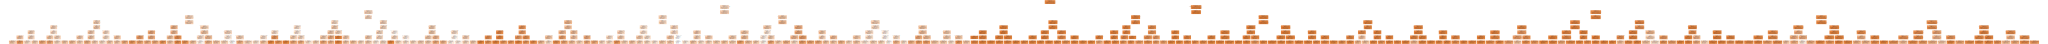

In [92]:
#class_values = dfFlatReduced[col_namesY].unique()
#feature_names = list(X_train.columns())
#dot_data = export_graphviz(mtTree, out_file=None, feature_names=)

dot_data = export_graphviz(mtTree, 
                           out_file=None, 
                           filled=True, 
                           special_characters= True, 
                           class_names=col_namesY,
                           feature_names=X_names)
graph = graphviz.Source(dot_data, format="svg")
graph